### CARGAR DATA SET NBA 23/24

In [1]:
import pandas as pd
nba_url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
nba_table = pd.read_html(nba_url)


nba = nba_table[0]
nba.head(5)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [2]:
nba.shape

(763, 30)

### LIMPIEZA DE NULOS

In [3]:
#LIMPIEZA DE NULOS
nba.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       46
2P         0
2PA        0
2P%       13
eFG%       8
FT         0
FTA        0
FT%       59
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [4]:
nba.dropna(subset=["Age"],inplace=True)

In [5]:
nba.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       46
2P         0
2PA        0
2P%       13
eFG%       8
FT         0
FTA        0
FT%       59
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [6]:
nba[nba["3P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23,18,Udoka Azubuike,C,24,PHO,16,0,7.1,1.0,1.4,...,.231,0.7,1.3,2.0,0.2,0.1,0.4,0.3,1.1,2.2
24,19,Ibou Badji,C,21,POR,22,1,10.3,0.6,1.0,...,.500,0.9,1.4,2.3,0.6,0.1,0.9,0.7,2.1,1.5
53,36,Darius Bazley,PF,23,PHI,3,0,3.3,0.0,0.3,...,NaN,0.0,0.3,0.3,0.7,0.0,0.0,0.3,0.0,0.0
69,46,Bismack Biyombo,C,31,TOT,40,27,19.8,1.9,3.3,...,.481,1.6,3.7,5.2,1.3,0.3,0.9,1.1,2.2,4.4
70,46,Bismack Biyombo,C,31,MEM,30,27,23.9,2.2,4.0,...,.478,1.9,4.5,6.4,1.7,0.3,1.1,1.3,2.7,5.2
71,46,Bismack Biyombo,C,31,OKC,10,0,7.3,0.7,1.2,...,.500,0.5,1.3,1.8,0.2,0.1,0.3,0.4,0.7,1.8
81,53,Marques Bolden,C,25,MIL,2,0,1.5,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0
108,74,Moses Brown,C,24,POR,22,5,9.1,1.5,3.0,...,.290,1.7,2.2,3.9,0.3,0.2,0.3,0.5,1.2,3.4
130,91,Colin Castleton,C,23,LAL,16,0,3.7,0.6,1.0,...,1.000,0.4,0.4,0.8,0.2,0.1,0.0,0.2,0.7,1.5
131,92,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
nba["3P%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/4121698549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["3P%"].fillna(0.0, inplace=True)


In [8]:
nba[nba["3P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [9]:
nba[nba["2P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
20,15,Ryan Arcidiacono,PG,29,NYK,20,0,2.3,0.0,0.3,...,NaN,0.0,0.4,0.4,0.2,0.1,0.0,0.1,0.3,0.0
81,53,Marques Bolden,C,25,MIL,2,0,1.5,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0
131,92,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,122,Mamadi Diakite,PF,27,NYK,3,0,2.7,0.0,0.3,...,NaN,0.0,0.3,0.3,0.0,0.3,0.0,0.3,0.3,0.0
248,175,Jacob Gilyard,PG,25,BRK,4,0,11.3,0.0,1.5,...,NaN,0.3,0.5,0.8,1.5,1.5,0.0,0.3,1.0,0.0
280,201,Ron Harper Jr.,PF,23,TOR,1,0,4.0,0.0,0.0,...,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
333,246,Justin Jackson,SF,28,MIN,2,0,0.5,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,254,Trey Jemison,C,24,WAS,2,0,0.5,0.0,0.0,...,NaN,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0
388,295,Kira Lewis Jr.,PG,22,TOR,1,0,2.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
536,395,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
nba["2P%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/3222797998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["2P%"].fillna(0.0, inplace=True)


In [11]:
nba["FG%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/1771916878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["FG%"].fillna(0.0, inplace=True)


In [12]:
nba["FT%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/2096491128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["FT%"].fillna(0.0, inplace=True)


In [13]:
nba["eFG%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/1568842716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["eFG%"].fillna(0.0, inplace=True)


In [14]:
nba[nba["2P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [15]:
nba[nba["FG%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [16]:
nba[nba["FT%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [17]:
nba[nba["eFG%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [18]:
nba.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [19]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [20]:
### ELIMINO FILAS QUE INDICAN LAS COLUMNAS HAY 28, las elimino por medio de la columna Rk

In [21]:
nba.drop(nba[nba["Rk"] == "Rk"].index, inplace = True)

In [22]:
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
759,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
760,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
761,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [23]:
#Elimino la columna Rk ya que no me sirve para más
del(nba["Rk"])

### LIMPIEZA DE TIPOS DE VARIABLES

In [34]:
# Convierto todas las variables numericas a FLOAT

In [35]:
float_col = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
for i in float_col:
    nba[i] = nba[i].astype(float)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/2929474899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba[i] = nba[i].astype(float)


In [36]:
nba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MVP'],
      dtype='object')

In [37]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 4 to 751
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  221 non-null    object 
 1   Pos     221 non-null    object 
 2   Age     221 non-null    float64
 3   Tm      221 non-null    object 
 4   G       221 non-null    float64
 5   GS      221 non-null    float64
 6   MP      221 non-null    float64
 7   FG      221 non-null    float64
 8   FGA     221 non-null    float64
 9   FG%     221 non-null    float64
 10  3P      221 non-null    float64
 11  3PA     221 non-null    float64
 12  3P%     221 non-null    float64
 13  2P      221 non-null    float64
 14  2PA     221 non-null    float64
 15  2P%     221 non-null    float64
 16  eFG%    221 non-null    float64
 17  FT      221 non-null    float64
 18  FTA     221 non-null    float64
 19  FT%     221 non-null    float64
 20  ORB     221 non-null    float64
 21  DRB     221 non-null    float64
 22  TRB    

In [38]:
### SOLO JUGADORES SUB 23
nba = nba[nba["Age"] <= 23]

In [39]:
nba.shape

(221, 30)

### MVP SUB23

In [43]:
pd.set_option('display.max_columns', None)

Voy a utilizar la ponderación estimada que da la NBA para las estadisticas individuales

In [80]:
nba["MVP"] = (nba['PTS'] * 0.30) + (nba["AST"] * 0.25) + (nba["STL"] * 0.1) + (nba["TRB"] * 0.25) + (nba['BLK'] * 0.1)

colsel_MVP = nba.loc[:, ["Player","Tm","Age","Pos","G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MVP"]]
colsel_MVP.sort_values(by = "MVP", ascending=False).head(10)


,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MVP
31,LaMelo Ball,CHO,22.0,PG,22.0,32.3,23.9,8.0,8.3,0.433,0.865,5.1,0.500,3.2,0.355,1.8,3.8,1.3,3.8,5.1,0.2,10.645
189,Anthony Edwards,MIN,22.0,SG,79.0,35.1,25.9,5.1,9.1,0.461,0.836,6.7,0.515,2.4,0.357,1.3,3.1,0.7,4.8,5.4,0.5,10.575
716,Victor Wembanyama,SAS,20.0,C,71.0,29.7,21.4,3.9,7.8,0.465,0.796,6.0,0.534,1.8,0.325,1.2,3.7,2.3,8.4,10.6,3.6,10.525
431,Tyrese Maxey,PHI,23.0,PG,70.0,37.5,25.9,6.2,9.1,0.450,0.868,6.1,0.501,3.0,0.373,1.0,1.7,0.5,3.2,3.7,0.5,10.395
612,Alperen Sengun,HOU,21.0,C,63.0,32.5,21.1,5.0,8.4,0.537,0.693,7.8,0.567,0.5,0.297,1.2,2.6,2.9,6.4,9.3,0.7,10.095
33,Paolo Banchero,ORL,21.0,PF,80.0,35.0,22.6,5.4,8.0,0.455,0.725,6.5,0.493,1.5,0.339,0.9,3.1,1.0,5.9,6.9,0.6,10.005
274,Tyrese Haliburton,IND,23.0,PG,69.0,32.2,20.1,10.9,7.2,0.477,0.855,4.4,0.595,2.8,0.364,1.2,2.3,0.5,3.4,3.9,0.7,9.920
154,Cade Cunningham,DET,22.0,PG,62.0,33.5,22.7,7.5,8.5,0.449,0.869,6.5,0.487,1.9,0.355,0.9,3.4,0.5,3.8,4.3,0.4,9.890
40,Scottie Barnes,TOR,22.0,SG,60.0,34.9,19.9,6.1,7.5,0.475,0.781,5.8,0.536,1.7,0.341,1.3,2.8,2.4,5.9,8.2,1.5,9.825
742,Zion Williamson,NOP,23.0,PF,70.0,31.5,22.9,5.0,8.9,0.570,0.702,8.8,0.574,0.1,0.333,1.1,2.8,1.7,4.1,5.8,0.7,9.750


### JUGADORES SUB 23 MAS VALIOSOS POR POSICIONES 23/24

Teniendo en cuenta la ponderación que estima la NBA para estadisticas individuales las voy a dividir, 
creando un ranking por posiciones variando el valor a cada variable según la importancia en cada posición

In [64]:
#BASE PROMESA. MOST VALUE U23 POINT GUARD

nba["MV.BA"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.1) + (nba["AST"] * 0.2) + (nba["STL"] * 0.1) - (nba["TOV"] * 0.08) + (nba["TRB"] * 0.05) + (nba['BLK'] * 0.02) + (nba["3P"] * 0.05) + (nba["3P%"] * 0.10)


base_promesa = nba.loc[(nba["G"] >= 40) & (nba["Pos"] == "PG") & (nba["MP"] >= 20.0) & (nba["PTS"] >= 5.0) & 
                       (nba["AST"] >= 4.0) & (nba["TOV"] <= 3) & (nba["STL"] >= 0.5)]

colsel_BASE = base_promesa.loc[:, ["Player","Tm","Age","Pos","G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MV.BA"]]
colsel_BASE.sort_values(by = "MV.BA", ascending=False)

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MV.BA
431,Tyrese Maxey,PHI,23.0,PG,70.0,37.5,25.9,6.2,9.1,0.450,0.868,6.1,0.501,3.0,0.373,1.0,1.7,0.5,3.2,3.7,0.5,9.30970
274,Tyrese Haliburton,IND,23.0,PG,69.0,32.2,20.1,10.9,7.2,0.477,0.855,4.4,0.595,2.8,0.364,1.2,2.3,0.5,3.4,3.9,0.7,8.82685
719,Coby White,CHI,23.0,PG,79.0,36.5,19.1,5.1,6.8,0.447,0.838,4.2,0.508,2.6,0.376,0.7,2.1,0.6,4.0,4.5,0.2,7.92020
234,Keyonte George,UTA,20.0,PG,75.0,27.0,13.0,4.4,4.3,0.391,0.848,2.3,0.459,2.0,0.334,0.5,2.5,0.2,2.6,2.8,0.1,5.73690
416,Tre Mann,TOT,22.0,PG,41.0,24.1,9.3,4.0,3.5,0.459,0.763,2.4,0.516,1.1,0.373,1.2,1.6,0.5,3.1,3.6,0.1,4.95535
291,Killian Hayes,DET,22.0,PG,42.0,24.0,6.9,4.9,2.8,0.413,0.660,2.3,0.455,0.5,0.297,0.9,1.2,0.3,2.6,2.8,0.5,4.68800


In [65]:
#ESCOLTA-ALERO SHOOTER PROMESA. MOST VALUE U23 SHOOTING GUARD / SMALL FORWARD SHOOTERS 

nba["MV.ES/AL"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.1) + (nba["AST"] * 0.1) + (nba["STL"] * 0.05) - (nba["TOV"] * 0.08)  + (nba["TRB"] * 0.05) + (nba['BLK'] * 0.02) + (nba["3P"] * 0.15) + (nba["3P%"] * 0.15)


esc_alero_promesa = nba.loc[(nba["G"] >= 40) & ((nba["Pos"] == "SG") | (nba["Pos"] == "SF") | (nba["Pos"] == "SF-SG")) & 
                             (nba["MP"] >= 20) & (nba["PTS"] >= 10.0) & (nba["3P"] >= 1.0) & (nba["3P%"] >= 0.350) &
                                (nba["2P"] >= 3.0) & (nba["2P%"] >= 0.5) & (nba["eFG%"] >= 0.4) ]

colsel_ES_AL = esc_alero_promesa.loc[:, ["Player", "Tm", "Age", "Pos", "G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "eFG%","MV.ES/AL"]]
colsel_ES_AL.sort_values(by="MV.ES/AL", ascending=False)


,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,eFG%,MV.ES/AL
189,Anthony Edwards,MIN,22.0,SG,79.0,35.1,25.9,5.1,9.1,0.461,0.836,6.7,0.515,2.4,0.357,1.3,3.1,0.7,4.8,5.4,0.5,0.522,8.50345
688,Devin Vassell,SAS,23.0,SG,68.0,33.1,19.5,4.1,7.3,0.472,0.801,4.9,0.544,2.4,0.372,1.1,1.6,0.4,3.4,3.8,0.3,0.550,7.27105
41,RJ Barrett,TOT,23.0,SG,58.0,31.7,20.2,3.3,7.5,0.495,0.715,6.0,0.549,1.6,0.360,0.5,2.2,0.9,4.5,5.4,0.4,0.547,7.03625
347,Jalen Johnson,ATL,22.0,SF,56.0,33.7,16.0,3.6,6.4,0.511,0.728,5.1,0.574,1.3,0.355,1.2,1.8,1.3,7.4,8.7,0.8,0.562,6.83275
491,Keegan Murray,SAC,23.0,SF,77.0,33.6,15.2,1.7,5.8,0.454,0.831,3.4,0.560,2.4,0.358,1.0,0.8,1.4,4.1,5.5,0.8,0.548,6.58765
21,Deni Avdija,WAS,23.0,SF,75.0,30.1,14.7,3.8,5.4,0.506,0.740,4.2,0.560,1.2,0.374,0.8,2.1,1.1,6.1,7.2,0.5,0.560,6.16070


In [66]:
#MOST VALUE ALA PIVOT U23

nba["MV.AP"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.15) + (nba["AST"] * 0.05) + (nba["STL"] * 0.05) - (nba["TOV"] * 0.05) + (nba["ORB"] * 0.05) + (nba["DRB"] * 0.05) +(nba["TRB"] * 0.1) + (nba['BLK'] * 0.1) + (nba["3P"] * 0.05) + (nba["3P%"] * 0.05)

AP_promesa = nba.loc[(nba["G"] >= 40) & ((nba["Pos"] == "PF") | (nba["Pos"] == "C-PF")) & (nba["MP"] >= 20) & (nba["PTS"] >= 10.0) & 
                     (nba["FG"] >= 3.0) & (nba["FG%"] >= 0.4) & (nba["ORB"] >= 1) & 
                     (nba["DRB"] >= 4.0) & (nba["TRB"] >= 5.0) & (nba["BLK"] >= 0.3)]

colsel_AP = AP_promesa.loc[:, ["Player", "Tm", "Age", "Pos", "G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MV.AP"]]
colsel_AP.sort_values(by="MV.AP", ascending=False)

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MV.AP
33,Paolo Banchero,ORL,21.0,PF,80.0,35.0,22.6,5.4,8.0,0.455,0.725,6.5,0.493,1.5,0.339,0.9,3.1,1.0,5.9,6.9,0.6,10.06870
742,Zion Williamson,NOP,23.0,PF,70.0,31.5,22.9,5.0,8.9,0.570,0.702,8.8,0.574,0.1,0.333,1.1,2.8,1.7,4.1,5.8,0.7,9.37875
472,Evan Mobley,CLE,22.0,PF,50.0,30.6,15.7,3.2,6.4,0.580,0.719,6.0,0.604,0.4,0.373,0.9,1.8,2.2,7.1,9.4,1.4,8.73760
635,Jabari Smith Jr.,HOU,20.0,PF,76.0,31.9,13.7,1.6,5.0,0.454,0.811,3.2,0.530,1.8,0.363,0.7,1.2,1.8,6.3,8.1,0.8,8.38410
648,Isaiah Stewart,DET,22.0,PF,46.0,30.9,10.9,1.6,4.0,0.487,0.753,2.6,0.575,1.5,0.383,0.4,1.4,1.6,5.0,6.6,0.8,7.55050
639,Jeremy Sochan,SAS,20.0,PF,74.0,29.6,11.6,3.4,4.6,0.438,0.771,3.6,0.492,0.9,0.308,0.8,1.9,1.9,4.6,6.4,0.5,7.45275
7,Santi Aldama,MEM,23.0,PF,61.0,26.5,10.7,2.3,4.0,0.435,0.621,2.3,0.534,1.7,0.349,0.7,1.1,1.2,4.6,5.8,0.9,6.81200


In [67]:
#MOST VALUE PIVOT U23

nba["MV.C"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.14) + (nba["AST"] * 0.05) + (nba["STL"] * 0.05) - (nba["TOV"] * 0.05) + (nba["ORB"] * 0.08) + (nba["DRB"] * 0.08) +(nba["TRB"] * 0.1) + (nba['BLK'] * 0.15)

Piv_promesa = nba.loc[(nba["G"] >= 40) & ((nba["Pos"] == "C") | (nba["Pos"] == "C-PF")) & 
                        (nba["MP"] >= 20) & (nba["PTS"] >= 10.0) & (nba["FG"] >= 3.0) & (nba["FG%"] >= 0.4) & 
                        (nba["ORB"] >= 1.5) & (nba["DRB"] >= 4.0) & (nba["TRB"] >= 6.0) & (nba["BLK"] >= 0.5)]

colsel_PIV = Piv_promesa.loc[:, ["Player", "Tm", "Age", "Pos", "G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MV.C"]]
colsel_PIV.sort_values(by="MV.C", ascending=False)

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MV.C
716,Victor Wembanyama,SAS,20.0,C,71.0,29.7,21.4,3.9,7.8,0.465,0.796,6.0,0.534,1.8,0.325,1.2,3.7,2.3,8.4,10.6,3.6,9.98030
612,Alperen Sengun,HOU,21.0,C,63.0,32.5,21.1,5.0,8.4,0.537,0.693,7.8,0.567,0.5,0.297,1.2,2.6,2.9,6.4,9.3,0.7,9.76235
311,Chet Holmgren,OKC,21.0,C,82.0,29.4,16.5,2.4,6.2,0.530,0.793,4.6,0.623,1.6,0.370,0.6,1.6,1.6,6.3,7.9,2.3,8.52065
187,Jalen Duren,DET,20.0,C,61.0,29.1,13.8,2.4,5.7,0.619,0.790,5.7,0.623,0.0,0.000,0.5,2.1,3.1,8.5,11.6,0.8,8.49340
520,Onyeka Okongwu,ATL,23.0,C,55.0,25.5,10.2,1.3,4.1,0.611,0.793,3.6,0.676,0.4,0.333,0.5,0.8,2.6,4.2,6.8,1.1,6.63975


### ESTIMACION SALARIO JUGADORES SUB 23 SEGÚN SALARIOS DATABASE 22/23

In [55]:
# SALARIOS 22/23
df = pd.read_csv("/Users/josealeman/Desktop/FreeCodeCamp/Ejercicios/Estadisticas_Individuales_NBA_U23/nba_2022-23_all_stats_with_salary.csv")

In [76]:
df

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,89,4.0,0.363,0.522,0.043,3.8,15.6,9.7,5.9,1.1,5.0,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,28,9.0,0.363,0.833,0.333,3.7,11.7,7.6,21.8,0.0,6.2,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,56,11.8,0.548,0.857,0.095,0.0,11.9,5.9,12.3,1.7,0.0,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,2.0,5.0,0.400,4.0,7.0,0.571,0.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,35,15.5,0.621,0.417,0.167,9.9,18.8,14.4,29.0,0.0,2.4,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


In [56]:
#FILTRAMOS SUB 23, MINUTOS JUGADOS Y PARTIDOS JUGADOS IGUAL QUE CON EL DATA SET 23/24
Sal_22_23 = df.loc[(df["Age"] <= 23) & (df["MP"] >= 20) & (df["GP"] >= 40)]

In [78]:
Sal_22_23["MVP"] = (Sal_22_23['PTS'] * 0.30) + (Sal_22_23["AST"] * 0.25) + (Sal_22_23["STL"] * 0.1) + (Sal_22_23["TRB"] * 0.25) + (Sal_22_23['BLK'] * 0.1)

Sal_22_23.sort_values(by = "MVP", ascending=False).head(10)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_877/1732208203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sal_22_23["MVP"] = (Sal_22_23['PTS'] * 0.30) + (Sal_22_23["AST"] * 0.25) + (Sal_22_23["STL"] * 0.1) + (Sal_22_23["TRB"] * 0.25) + (Sal_22_23['BLK'] * 0.1)


,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVP
104,104,Ja Morant,12119440,PG,23,MEM,61,59,31.9,9.3,19.9,0.466,1.5,4.9,0.307,7.8,15.0,0.519,0.504,6.1,8.1,0.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2,1948,23.3,0.557,0.247,0.409,3.3,16.1,9.7,41.1,1.6,0.7,12.6,34.9,3.4,2.6,6.0,0.148,5.2,0.5,5.7,3.8,11.500
115,115,Anthony Edwards,10733400,SG,21,MIN,79,79,36.0,8.9,19.5,0.459,2.7,7.3,0.369,6.3,12.2,0.513,0.528,4.0,5.3,0.756,0.6,5.2,5.8,4.4,1.6,0.7,3.3,2.4,24.6,2842,17.4,0.564,0.375,0.274,1.9,15.9,9.0,19.3,2.1,1.8,13.0,29.9,0.2,3.6,3.8,0.064,1.0,0.0,1.0,2.1,10.160
216,216,Tyrese Haliburton,4215120,PG,22,IND,56,56,33.6,7.4,15.0,0.490,2.9,7.2,0.400,4.5,7.8,0.572,0.586,3.1,3.6,0.871,0.6,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7,1883,23.6,0.624,0.478,0.239,1.9,10.1,6.0,47.6,2.3,1.1,13.2,23.8,6.4,1.2,7.6,0.195,7.0,0.2,7.2,4.4,9.935
137,137,Darius Garland,8920794,PG,23,CLE,69,69,35.5,7.6,16.4,0.462,2.4,6.0,0.410,5.1,10.4,0.492,0.537,4.0,4.7,0.863,0.4,2.3,2.7,7.8,1.2,0.1,2.9,2.1,21.6,2447,18.8,0.587,0.365,0.284,1.3,7.6,4.5,34.1,1.7,0.3,13.5,26.9,4.5,3.0,7.6,0.148,3.2,-0.7,2.4,2.7,9.235
111,111,Paolo Banchero,11055120,PF,20,ORL,72,72,33.8,6.7,15.6,0.427,1.2,4.0,0.298,5.5,11.6,0.471,0.465,5.5,7.4,0.738,1.2,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,2430,14.9,0.529,0.254,0.476,3.9,19.3,11.6,17.2,1.2,1.5,12.8,27.5,-0.3,2.6,2.4,0.047,-0.7,-0.7,-1.5,0.3,8.780
229,229,Keldon Johnson,3873024,SF,23,SAS,63,63,32.7,8.0,17.7,0.452,2.1,6.5,0.329,5.9,11.2,0.523,0.512,3.9,5.2,0.749,0.9,4.2,5.0,2.9,0.7,0.2,2.1,2.0,22.0,2063,15.3,0.551,0.366,0.294,2.9,14.4,8.4,13.7,1.1,0.4,9.6,27.9,0.7,0.5,1.3,0.030,0.7,-2.5,-1.8,0.1,8.665
171,171,Josh Giddey,6287400,PF,20,OKC,76,76,31.1,7.1,14.7,0.482,1.0,3.1,0.325,6.1,11.6,0.524,0.516,1.4,1.9,0.731,1.9,5.9,7.9,6.2,0.8,0.4,2.8,1.9,16.6,2367,17.1,0.533,0.209,0.130,6.6,20.9,13.6,29.9,1.1,1.2,15.1,24.6,1.3,2.7,4.0,0.081,1.5,-0.3,1.2,1.9,8.625
128,128,Jalen Green,9441840,SG,20,HOU,76,76,34.2,7.4,17.9,0.416,2.5,7.3,0.338,5.0,10.6,0.471,0.485,4.8,6.1,0.786,0.6,3.2,3.7,3.7,0.8,0.2,2.6,1.7,22.1,2602,14.5,0.538,0.408,0.341,1.8,10.3,6.0,17.3,1.1,0.7,11.3,28.1,1.4,0.5,1.8,0.034,0.5,-2.6,-2.1,0.0,8.580
184,184,Tyler Herro,5722116,SG,23,MIA,67,67,34.9,7.3,16.6,0.439,3.0,8.0,0.378,4.2,8.5,0.497,0.531,2.5,2.7,0.934,0.4,5.0,5.4,4.2,0.8,0.2,2.4,1.5,20.1,2337,15.3,0.566,0.484,0.164,1.3,17.3,9.0,19.9,1.1,0.7,11.7,25.6,1.1,2.4,3.5,0.072,1.5,-0.8,0.6,1.6,8.530
52,52,Anfernee Simons,22321429,SG,23,POR,62,62,35.0,7.5,16.9,0.447,3.4,9.1,0.377,4.1,7.8,0.528,0.548,2.6,2.9,0.894,0.3,2.3,2.6,4.1,0.7,0.2,2.1,2.3,21.1,2171,14.8,0.581,0.538,0.171,0.9,7.6,4.3,18.6,0.9,0.6,10.2,25.1,2.1,0.3,2.5,0.054,1.3,-2.5,-1.1,0.5,8.095


In [57]:
Sal_22_23.shape

(53, 52)

In [58]:
#SALARIO SUB 23 MAS BAJO POR POSICIONES UNA VEZ FILTRADO
Sal_22_23.groupby("Position")["Salary"].min()

Position
C     2696400
PF    2200000
PG    1782621
SF    2161440
SG    1563518
Name: Salary, dtype: int64

In [59]:
#SALARIO SUB 23 MAS ALTO POR POSICIONES UNA VEZ FILTRADO
Sal_22_23.groupby("Position")["Salary"].max()

Position
C      6395160
PF    11055120
PG    12119440
SF    15277778
SG    22321429
Name: Salary, dtype: int64

### ANALISIS UNA VEZ SACADOS LOS JUGADORES

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
nba3 = nba.copy()

In [71]:
##TARGETS POR POSICIONES

BASE_TGT = base_promesa.loc[:, ["Player", "AST", "MV.BA"]].to_dict()
ES_AL_TGT = esc_alero_promesa.loc[:, ["Player","3P%", "MV.ES/AL"]].to_dict()
AP_TGT = AP_promesa.loc[:, ["Player", "TRB","MV.AP"]].to_dict()
PIV_TGT = Piv_promesa.loc[:, ["Player",'BLK',"MV.C"]].to_dict()


<Axes: xlabel='MV.BA', ylabel='AST'>

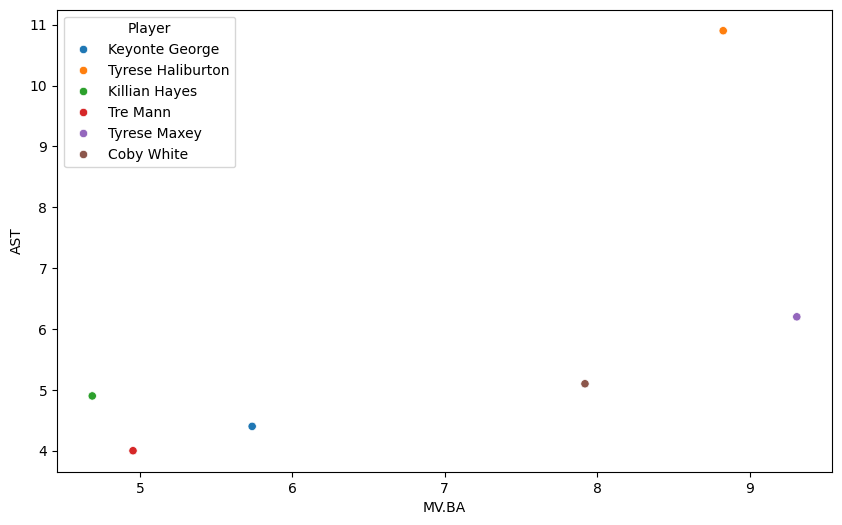

In [72]:
## PLOT BASES X ASISTENCIAS
plt.figure(figsize=(10, 6))
sns.scatterplot(x="MV.BA",y="AST", hue = "Player",data=BASE_TGT)

<Axes: xlabel='MV.ES/AL', ylabel='3P%'>

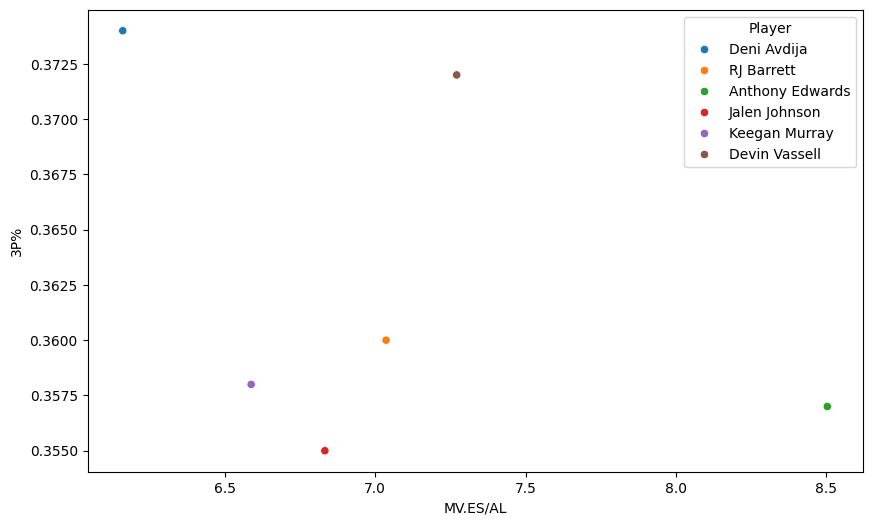

In [73]:
#PLOT TIRADORES X 3P%
plt.figure(figsize=(10, 6))
sns.scatterplot(x="MV.ES/AL",y="3P%",hue = "Player", data=ES_AL_TGT)

<Axes: xlabel='MV.AP', ylabel='TRB'>

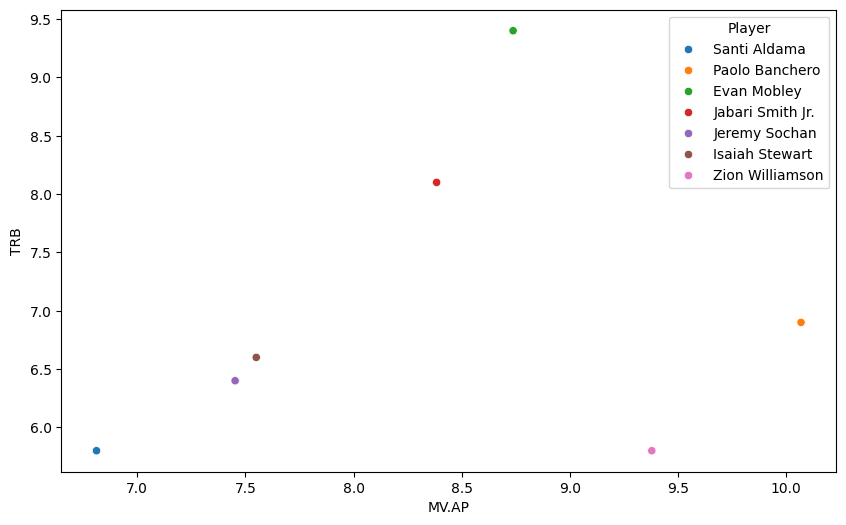

In [74]:
#PLOT ALAPIVOT x TOTAL REBOTES
plt.figure(figsize=(10, 6))
sns.scatterplot(x="MV.AP",y="TRB",hue = "Player",data=AP_TGT)

<Axes: xlabel='MV.C', ylabel='BLK'>

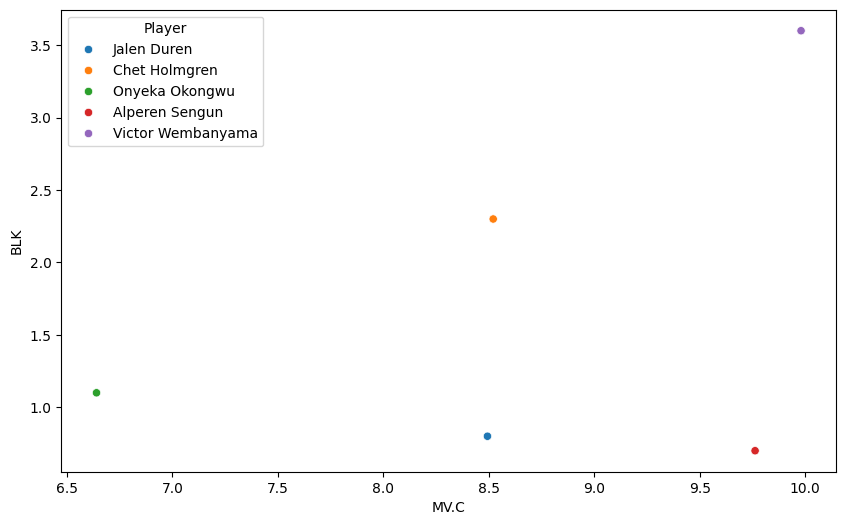

In [75]:
#PLOT PIVOT X TAPONES
plt.figure(figsize=(10, 6))
sns.scatterplot(x="MV.C",y="BLK",hue = "Player",data=PIV_TGT)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
nba2 = nba.copy()

In [ ]:
del(nba2['MV.BA'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir las características (features) y el objetivo (target)
X = nba2
y = nba['MV.BA']  # Supongamos que queremos predecir 'MV.BA'

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


ValueError: could not convert string to float: 'Noah Clowney'